<a href="https://colab.research.google.com/github/RafaBessa/Learning_NeuralNets/blob/master/DiabetesClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

link do tutorial https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

RoadMap - keras net
1. Load Data
2. Define NeuralNet
3. Compile Keras
4.Train the model
5. Evaluate the model
6. Make predictions with the model

In [0]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from google.colab import files
import numpy as np
import io
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd

In [7]:
uploaded = files.upload()
#print(uploaded)
df2 = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))
#print(df2)


Saving diabetes.csv to diabetes (4).csv


In [25]:
dataset = df2.values
#print(dataset)
x = dataset[:,0:8]
y = dataset[:,8]
#separating into test and validation
x_val = x[0:10,:]
y_val = y[0:10]
x = x[10:,:]
y = y[10:]
print(len(x))

757


In [9]:
#define The keras Model


model = Sequential()
model.add(Dense(12, input_dim=8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


#he most confusing thing here is that the shape of the
#input to the model lis defined as an argument on the first hidden layer. 
#This means that the line of code that adds the first Dense layer is doing 
#2 things, defining the input or visible layer and the first hidden layer.

In [10]:
#compile the keras model

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [28]:
#fit the keras model on dataset

FitModel = model.fit(x,y,epochs=150,batch_size=10,validation_data=(x, y))
#x ->entrada/ y->saida esperada/ 
#Epochs -> quantas vzs o dataset sera usado
#batch_size -> quantas linha do dataset serao usados antes de atualizar os pesos
#validation_data -> dataset de test

Train on 757 samples, validate on 757 samples
Epoch 1/150
757/757 [==============================] - 0s 203us/step - loss: 0.4166 - acc: 0.8018 - val_loss: 0.3933 - val_acc: 0.8111
Epoch 2/150
757/757 [==============================] - 0s 190us/step - loss: 0.4118 - acc: 0.8005 - val_loss: 0.3741 - val_acc: 0.8375
Epoch 3/150
757/757 [==============================] - 0s 180us/step - loss: 0.3975 - acc: 0.8164 - val_loss: 0.3868 - val_acc: 0.8098
Epoch 4/150
757/757 [==============================] - 0s 180us/step - loss: 0.4147 - acc: 0.7952 - val_loss: 0.3903 - val_acc: 0.8071
Epoch 5/150
757/757 [==============================] - 0s 176us/step - loss: 0.4231 - acc: 0.7952 - val_loss: 0.3836 - val_acc: 0.8124
Epoch 6/150
757/757 [==============================] - 0s 173us/step - loss: 0.4135 - acc: 0.8058 - val_loss: 0.3951 - val_acc: 0.8190
Epoch 7/150
757/757 [==============================] - 0s 177us/step - loss: 0.3952 - acc: 0.8217 - val_loss: 0.3822 - val_acc: 0.8203
Epoch 8/1

In [30]:
#evaluate the keras model

_, accuracy = model.evaluate(x,y)
print('Accuracy: %.2f' % (accuracy*100))

757/757 [==============================] - 0s 37us/step
Accuracy: 82.43


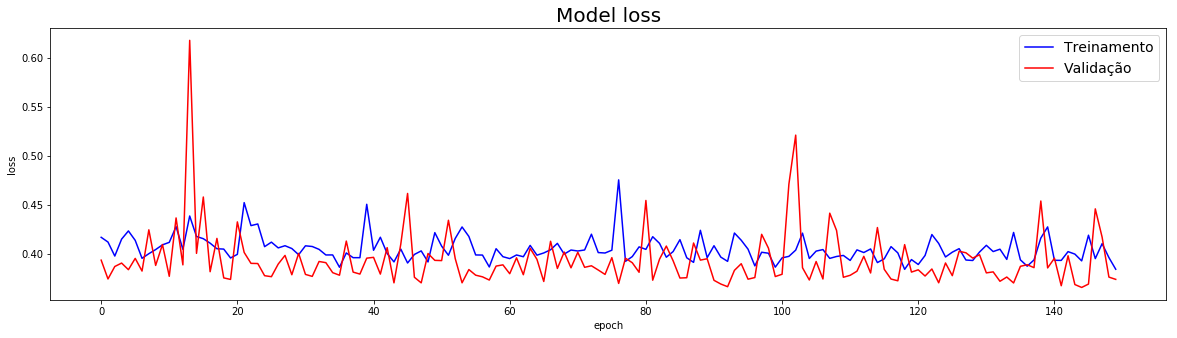

In [29]:
#print(FitModel.history)

plt.figure(figsize=(20, 5))
plt.plot(FitModel.history['loss'], color='blue')
plt.plot(FitModel.history['val_loss'], color='red')
plt.title('Model loss', fontsize=20)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Treinamento', 'Validação'], loc='upper right', fontsize=14)
plt.show()

In [14]:
#predictions

#make probability predictions with the model
predictions = model.predict(x)
#round predictions
rounded = [round(x[0]) for x in predictions]
#print (rounded)

#make probability predictions with the model
predictions = model.predict_classes(x)
for i in range(5):
	print('%s => %d (expected %d)' % (x[i].tolist(), predictions[i], y[i]))

[6.0, 111.0, 64.0, 39.0, 0.0, 34.2, 260.0, 24.0] => 1 (expected 0)
[2.0, 107.0, 74.0, 30.0, 100.0, 33.6, 404.0, 23.0] => 0 (expected 0)
[5.0, 132.0, 80.0, 0.0, 0.0, 26.8, 186.0, 69.0] => 0 (expected 0)
[0.0, 113.0, 76.0, 0.0, 0.0, 33.3, 278.0, 23.0] => 0 (expected 1)
[1.0, 88.0, 30.0, 42.0, 99.0, 55.0, 496.0, 26.0] => 1 (expected 1)
